In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import numpy as np
from imageio.v2 import imread
from numpy.random import normal, uniform
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def frankes_function(x, y):
    z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
        + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
        + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
        - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2)))
    return z

def create_feature_matrix(x, y, degree):
    # Stack x and y into a feature matrix
    X = np.vstack((x.ravel(), y.ravel())).T
    
    # Create polynomial features
    poly = PolynomialFeatures(degree, include_bias=True)
    poly_features = poly.fit_transform(X)
    
    return poly_features

def plot_3d(x, y, z, title):
    #Plot (code taken from project description)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.title(title)
    plt.show()

#Make data
n = 500
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05) + np.random.normal(0, 0.1, x.shape)

# x = np.linspace(-1, 3, n)
# y = np.linspace(-1, 3, n)

x, y = np.meshgrid(x, y)
z = frankes_function(x, y) #+ np.random.normal(0, 0.1, x.shape)

# #Test plot
# plot_3d(x, y, z, "Franke's Function Test Plot")

#Real data
#TODO: Smooth switch
# # Load the terrain - again from project description
# terrain = imread('SRTM_data_Norway_2.tif')

# N = 100
# m = 5 # polynomial order
# terrain = terrain[:N,:N]
# # Creates mesh of image pixels
# x = np.linspace(0,1, np.shape(terrain)[0])
# y = np.linspace(0,1, np.shape(terrain)[1])
# x, y = np.meshgrid(x,y)

# z = terrain



# a) Ordinary Least Squares on the Franke function
# b) Ridge and dependence on lambda
# c) Lasso
# e) Perform then a bias-variance analysis of the Franke function by studying the MSE value as function of the complexity of your model.

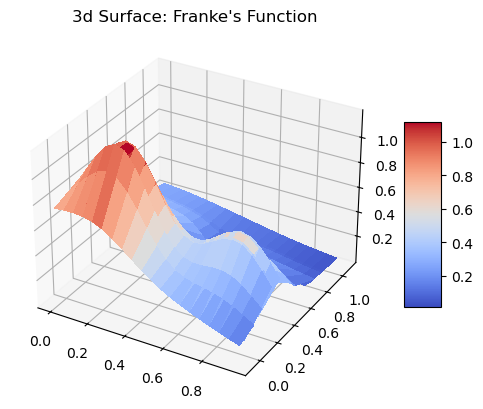

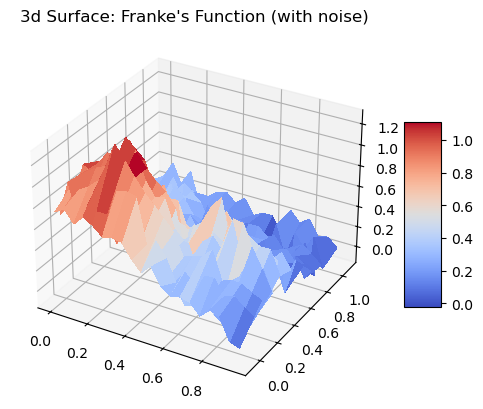

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from random import random, seed

def frankes_function(x, y):
    z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
        + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
        + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
        - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2)))
    return z

z_noise = frankes_function(x, y) + np.random.normal(0, 0.1, x.shape)

#Plot (code taken from project description)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("3d Surface: Franke's Function")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z_noise, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("3d Surface: Franke's Function (with noise)")
plt.show()

In [ ]:
#Quick look at the data values
print(f"z max: {z.max()}")
print(f"z min: {z.min()}")
print(f"z mean: {z.mean()}")
print(f"z shape: {z.shape}")

scaler = StandardScaler()
z_scaled = scaler.fit_transform(z)

#Plot (code taken from project description)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z_scaled, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Quick look at the data values
print(f"z_scaled max: {z_scaled.max()}")
print(f"z_scaled min: {z_scaled.min()}")
print(f"z_scaled mean: {z_scaled.mean()}")
print(f"z_scaled shape: {z_scaled.shape}")

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Landscape Data (scaled)")
plt.show()

z = z_scaled.ravel() # Flatten z into a 1D array for regression (from ChatGPT)

In [ ]:
def MSE(z_data, z_model):
    n = np.size(z_model)  # Number of data points
    return np.sum((z_data - z_model)**2)/n

# Ridge Regression using matrix inversion
def Beta_ridge_regression(X, z, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(z)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

[ 0.94072112 -0.53401876 -0.54207966]
Degree: 1
MSE (training): 0.04120330489320784
MSE (test): 0.04347334431440303
r2 (training): 0.5763940877151994
r2 (test): 0.5789149181663593

Degree: 2
MSE (training): 0.031168954115897412
MSE (test): 0.03883809002887008
r2 (training): 0.6586433276806266
r2 (test): 0.6948498656196969

Degree: 3
MSE (training): 0.018249215979112113
MSE (test): 0.02046326924198198
r2 (training): 0.8093882541167791
r2 (test): 0.8134090730554683

Degree: 4
MSE (training): 0.015241713667481439
MSE (test): 0.014495633927561808
r2 (training): 0.8440482153718735
r2 (test): 0.8575144857243323

Degree: 5
MSE (training): 0.011761585681991335
MSE (test): 0.012366258576125333
r2 (training): 0.8790375321963082
r2 (test): 0.8796392035849572



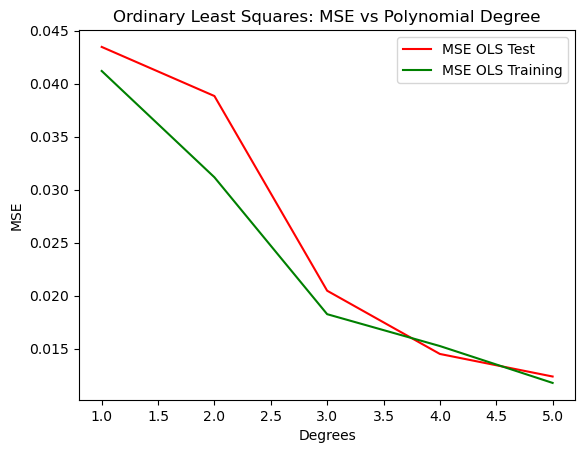

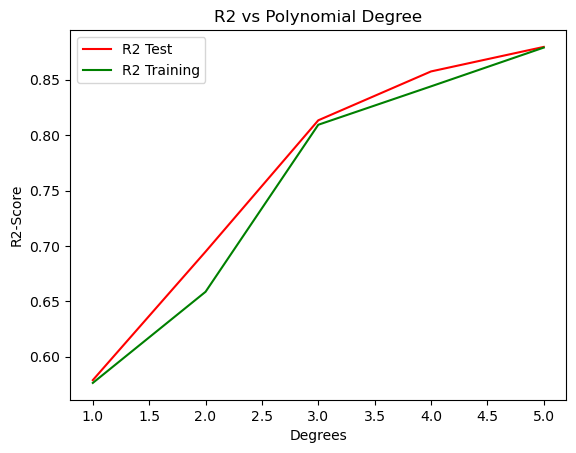

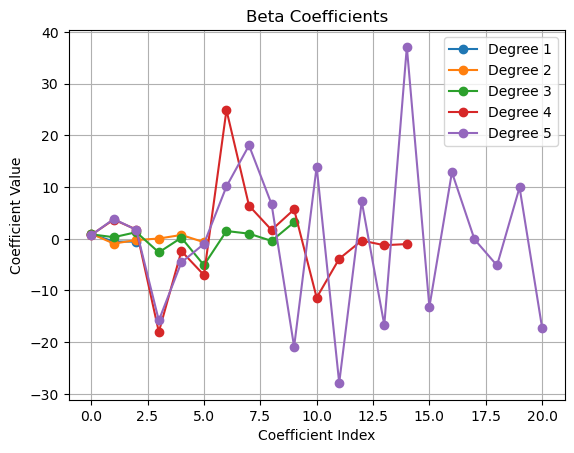

In [10]:
#Polynomials up to 5th order
def create_feature_matrix(x, y, degree):
    # Stack x and y into a feature matrix
    X = np.vstack((x.ravel(), y.ravel())).T
    
    # Create polynomial features
    poly = PolynomialFeatures(degree, include_bias=True)
    poly_features = poly.fit_transform(X)
    
    return poly_features

def MSE(z_data, z_model):
    n = np.size(z_model)  # Number of data points
    return np.sum((z_data - z_model)**2)/n


z = z_noise.ravel()
#z = z_scaled
train_MSEs = []
test_MSEs = []
train_r2s = []
test_r2s = []
betas = []

degrees = range(1,6)
for order in degrees:
    coefficients = []
    feature_matrix = create_feature_matrix(x, y, order)

    X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

    #Matrix inversion
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices
    

    if order == 1:
        print(beta)
    for coeff in beta:
        coefficients.append(coeff)
    betas.append(coefficients)

    #Make the prediction
    z_tilde = X_train @ beta
    z_predict = X_test @ beta

    #OLS
    training_mse = MSE(z_train, z_tilde)
    test_mse = MSE(z_test, z_predict)

    train_MSEs.append(training_mse)
    test_MSEs.append(test_mse)

    print(f"Degree: {order}")
    print(f"MSE (training): {training_mse}")
    print(f"MSE (test): {test_mse}")

    #R2
    r2_training = error.r2_score(z_train, z_tilde)
    r2_test = error.r2_score(z_test, z_predict)
    print(f"r2 (training): {r2_training}")
    print(f"r2 (test): {r2_test}")
    print()

    train_r2s.append(r2_training)
    test_r2s.append(r2_test)

#Plot the mse vs. degrees
plt.figure()
plt.title("Ordinary Least Squares: MSE vs Polynomial Degree")
plt.plot(degrees, test_MSEs, 'r', label = 'MSE OLS Test')
plt.plot(degrees, train_MSEs, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Plot R2 vs. degrees
plt.figure()
plt.title("R2 vs Polynomial Degree")
plt.plot(degrees, test_r2s, 'r', label = 'R2 Test')
plt.plot(degrees, train_r2s, 'g', label = 'R2 Training')

plt.xlabel('Degrees')
plt.ylabel('R2-Score')
plt.legend()
plt.show()

for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')
    i += 1

# Adding plot details
plt.title('Beta Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ridge and Lasso Regression using matrix inversion
def Beta_ridge_regression(X, z, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(z)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

degree = 4
feature_matrix = create_feature_matrix(x, y, degree)
X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

training_ridge_mses = []
test_ridge_mses = []
training_ridge_r2s = []
test_ridge_r2s = []
betas_ridge = []

training_lasso_mses = []
test_lasso_mses = []
training_lasso_r2s = []
test_lasso_r2s = []

lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
nlambdas = 100
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]

    #Ridge
    beta_hat_ridge = Beta_ridge_regression(X_train, z_train, lmb)
    betas_ridge.append(beta_hat_ridge)
    z_tilde_ridge = Calculate_y_ridge(X_train, beta_hat_ridge)
    z_predict_ridge = Calculate_y_ridge(X_test, beta_hat_ridge)

    train_mse = error.mean_squared_error(z_train, z_tilde_ridge)
    test_mse = error.mean_squared_error(z_test, z_predict_ridge)
    training_ridge_mses.append(train_mse)
    test_ridge_mses.append(test_mse)

    r2_train = error.r2_score(z_train, z_tilde_ridge)
    r2_test = error.r2_score(z_test, z_predict_ridge)
    training_ridge_r2s.append(r2_train)
    test_ridge_r2s.append(r2_test)

    #Lasso
    RegLasso = linear_model.Lasso(lmb, fit_intercept=False)
    RegLasso.fit(X_train, z_train)
    y_tilde_lasso = RegLasso.predict(X_train)
    y_predict_lasso = RegLasso.predict(X_test)

    training_lasso_mses.append(error.mean_squared_error(z_train, y_tilde_lasso))
    test_lasso_mses.append(error.mean_squared_error(z_test, y_predict_lasso))

    training_lasso_r2s.append(error.r2_score(z_train, y_tilde_lasso))
    test_lasso_r2s.append(error.r2_score(z_test, y_predict_lasso))

# R2 Ridge/Lasso plots
plt.figure()
plt.title("Ridge and Lasso - R2 Score - Degrees: " + str(degree))

plt.plot(np.log10(lambdas), test_ridge_r2s, 'r', label = 'R2 Ridge Test')
plt.plot(np.log10(lambdas), training_ridge_r2s, 'g', label = 'R2 Ridge Training')

plt.plot(np.log10(lambdas), test_lasso_r2s, 'b--', label = 'R2 Lasso Test')
plt.plot(np.log10(lambdas), training_lasso_r2s, '--', color='orange', label = 'R2 Lasso Training')

plt.xlabel('log10(lambda)')
plt.ylabel('R2')
plt.legend()
plt.show()

# MSE Ridge/Lasso plots
plt.figure()
plt.title("Ridge and Lasso - MSE Score - Degrees: " + str(degree))

plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

plt.plot(np.log10(lambdas), test_lasso_mses, 'b--', label = 'MSE Lasso Test')
plt.plot(np.log10(lambdas), training_lasso_mses, '--', color='orange', label = 'MSE Lasso Training')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

# e) Bootstrap

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample



n = 500
n_bootstraps = 50
noise = 0.1
max_degrees = 5

errors = np.zeros(max_degrees)
biases = np.zeros(max_degrees)
variances = np.zeros(max_degrees)
polydegrees = np.zeros(max_degrees)
for degree in range(max_degrees):
    feature_matrix = create_feature_matrix(x, y, degree)

    z = z.ravel() # Flatten z into a 1D array for regression (from ChatGPT)
    X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices

    #From lecture notes
    #Make the prediction
    z_tilde = X_train @ beta
    z_predict = X_test @ beta

    # Combine x transformation and model into one operation.
    # Not necessary, but convenient.
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

    # The following (m x n_bootstraps) matrix holds the column vectors z_pred
    # for each bootstrap iteration.
    z_pred = np.empty((z_test.shape[0], n_bootstraps))  # Adjust for 3D case

    # Perform bootstrapping
    for i in range(n_bootstraps):
        # Resample the training data
        X_resampled, z_resampled = resample(X_train, z_train)
        model.fit(X_resampled, z_resampled)
        # Fit the model on resampled data and evaluate on the same test data
        z_pred[:, i] = model.fit(X_resampled, z_resampled).predict(X_test).ravel()  # Prediction in 3D

    # Reshape z_test to match the dimensions of z_pred for broadcasting
    z_test_reshaped = z_test.reshape(-1, 1)  # Reshape to (80, 1)

    polydegrees[degree] = degree
    # Error calculation (mean squared error across all bootstrap samples and test points)
    error = np.mean(np.mean((z_test_reshaped - z_pred)**2, axis=1, keepdims=True))
    errors[degree] = error
    # Bias^2 calculation (bias as the difference between true values and the mean prediction)
    bias = np.mean((z_test_reshaped - np.mean(z_pred, axis=1, keepdims=True))**2)
    biases[degree] = bias
    # Variance calculation (variance of predictions across bootstrap samples)
    variance = np.mean(np.var(z_pred, axis=1,keepdims=True))
    variances[degree] = variance

    # Note: Expectations and variances taken w.r.t. different training
    # data sets, hence the axis=1. Subsequent means are taken across the test data
    # set in order to obtain a total value, but before this we have error/bias/variance
    # calculated per data point in the test set.
    # Note 2: The use of keepdims=True is important in the calculation of bias as this 
    # maintains the column vector form. Dropping this yields very unexpected results.
    # error = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    # bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    # variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error)
    print('Bias^2:', bias)
    print('Var:', variance)
    print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))
    print()

plt.plot(polydegrees, errors, label='Error')
plt.plot(polydegrees, biases, label='Bias')
plt.plot(polydegrees, variances, label='Variance')
plt.title('Bias-Variance Trade-Off')
plt.xlabel('Degrees')
plt.ylabel('Errors')
plt.legend()
plt.show()

# f) k-fold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


k_folds = range(5,11)
degrees = range(1,5)

degree = 3

ols_k_mses = []
ridge_k_mses = []
lasso_k_mses = []
i = 0
for k in k_folds:
    kfold = KFold(n_splits = k)
    
    #OLS
    estimated_mse_ols = np.zeros(len(degrees))
    j = 0
    #for degree in degrees:
        # Decide degree on polynomial to fit
    poly = PolynomialFeatures(degree = degree)

    X = create_feature_matrix(x, y, degree)

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    ols = LinearRegression()
    estimated_mse_folds = cross_val_score(ols, X, z[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_ols[j] = np.mean(-estimated_mse_folds)

    j += 1

    ols_k_mses.append(estimated_mse_ols)

    #Ridge and Lasso
    # Decide which values of lambda to use
    nlambdas = 500
    lambdas = np.logspace(-3, 5, nlambdas)
    #From lecture notes:
    ## Cross-validation using cross_val_score from sklearn along with KFold
    estimated_mse_ridge = np.zeros(nlambdas)
    estimated_mse_lasso = np.zeros(nlambdas)
    j = 0
    for lmb in lambdas:
        ridge = Ridge(alpha = lmb)
        lasso = Lasso(alpha = lmb)

        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_folds = cross_val_score(ridge, X, z[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)
        estimated_mse_ridge[j] = np.mean(-estimated_mse_folds)

        estimated_mse_folds = cross_val_score(lasso, X, z[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)
        estimated_mse_lasso[j] = np.mean(-estimated_mse_folds)

        j += 1

    i += 1
    print(f"k = {k}")
    ridge_k_mses.append(estimated_mse_ridge)
    lasso_k_mses.append(estimated_mse_lasso)


## Plots
#OLS
plt.figure()
i = 0
for estimate in ols_k_mses:
    plt.plot(degrees, estimate, label = f"cross_val_score k = {k_folds[i]}")
    i += 1
plt.xlabel('degrees')
plt.ylabel('mse')
plt.legend()
plt.title("OLS")

plt.show()

#Ridge
plt.figure()
i = 0
for estimate in ridge_k_mses:
    plt.plot(np.log10(lambdas), estimate, label = f"cross_val_score k = {k_folds[i]}")
    i += 1
plt.xlabel('log10(lambda)')
plt.ylabel('mse')
plt.legend()
plt.title("Ridge")

plt.show()

#Lasso
plt.figure()
i = 0
for estimate in lasso_k_mses:
    plt.plot(np.log10(lambdas), estimate, label = f"cross_val_score k = {k_folds[i]}")
    i += 1
plt.xlabel('log10(lambda)')
plt.ylabel('mse')
plt.legend()
plt.title("Lasso")

plt.show()



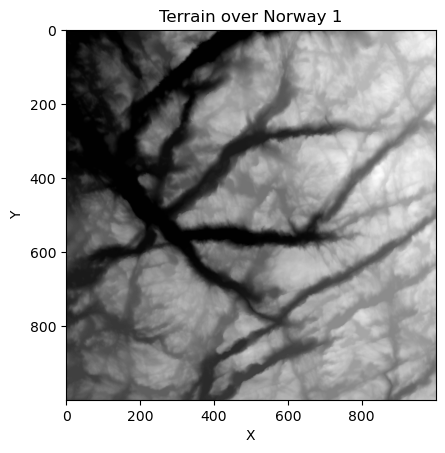

In [7]:
# Load the terrain - again from project description
terrain = imread('SRTM_data_Norway_2.tif')

N = 1000
m = 5 # polynomial order
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
#X = create_X(x_mesh, y_mesh,m)


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
